In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *

In [4]:
# Load the data
data = pd.read_csv('Data/merged_data.csv')

max_missing_percentage = 20

columns_to_drop = []

for i in range(len(data.columns)):
    missing_count = data.iloc[:, i].isnull().sum()
    missing_percentage = missing_count / len(data) * 100
    
    # Add column to drop list if missing_percentage is greater than max_missing_percentage
    if missing_percentage > max_missing_percentage:
        columns_to_drop.append(data.columns[i])

# Drop the columns after iterating
data = data.drop(columns_to_drop, axis=1)

#Calculate mean of all variables starting with "sun"
sun_columns = data.filter(like='sun_')
sun_mean = sun_columns.mean(axis=1)
data['sun_mean'] = sun_mean
data['sun_mean'] = data['sun_mean'].fillna(0)

for column in data.columns:
    # Check if the column starts with 'sun_' and is not 'sun_mean'
    if column.startswith('sun_') and column != 'sun_mean':
        for row in range(len(data)):
            # Check if the value is NaN
            if np.isnan(data.loc[row, column]):
                # Replace NaN with the mean of the corresponding row
                data.loc[row, column] = data['sun_mean'].loc[row]

# Calculate mean of all variables starting with "wind"
wind_columns = data.filter(like='wind_')
wind_mean = wind_columns.mean(axis=1)
data['wind_mean'] = wind_mean
data['wind_mean'] = data['wind_mean'].fillna(0)

for column in data.columns:
    # Check if the column starts with 'wind_' and is not 'wind_mean'
    if column.startswith('wind_') and column != 'wind_mean':
        for row in range(len(data)):
            # Check if the value is NaN
            if np.isnan(data.loc[row, column]):
                # Replace NaN with the mean of the corresponding row
                data.loc[row, column] = data['wind_mean'].loc[row]

# Calculate mean of all variables starting with "temp"
temp_columns = data.filter(like='temp_')
temp_mean = temp_columns.mean(axis=1)
data['temp_mean'] = temp_mean
data['temp_mean'] = data['temp_mean'].fillna(0)

for column in data.columns:
    # Check if the column starts with 'temp_' and is not 'temp_mean'
    if column.startswith('temp_') and column != 'temp_mean':
        for row in range(len(data)):
            # Check if the value is NaN
            if np.isnan(data.loc[row, column]):
                # Replace NaN with the mean of the corresponding row
                data.loc[row, column] = data['temp_mean'].loc[row]

# area_to_drop = 'DK1_spot'

# Drop DK1_spot and DATE
# data = data.drop([area_to_drop, 'DATE'], axis=1)
# data = data.drop(['sun_mean', 'wind_mean'], axis=1)


In [5]:
# Save data
data.to_csv('Data/non_nan_data.csv', index=False)

Standard AR-model with exogenous variables

In [33]:
# Load data
data = pd.read_csv('Data/non_nan_data.csv')

data = data.drop(['DK1_spot', 'DATE'], axis=1)
data = data.drop(['sun_mean', 'wind_mean', 'temp_mean'], axis=1)

data_np = data.to_numpy()

y = data_np[:, 0].reshape(-1, 1)
weather = data_np[:, 1:-2]

hour_dummies = sdummy(len(data), 24)

all = np.concatenate((weather, hour_dummies), axis=1)

p = 1
con = 0
tr = 0
exog = 0
# exog = weather
exog = all
# exog = hour_dummies

Beta, SEbeta, _, Pvalue, tratioBeta, _, _, _, aiccrit, hqccrit, siccrit = VARlsExog(y, p, con, tr, exog)

# Collect beta, SEbeta and tratioBeta in a single dataframe
results = pd.DataFrame()
results['Beta'] = Beta.reshape(-1, order='F')
results['SEbeta'] = SEbeta
results['Pvalue'] = Pvalue

print(aiccrit, hqccrit, siccrit)

results[['Beta', 'SEbeta', 'Pvalue']] = results[['Beta', 'SEbeta', 'Pvalue']].round({'Beta': 3, 'SEbeta': 3, 'Pvalue': 3})

9.264091676270045 9.264153103879671 9.264293490179238


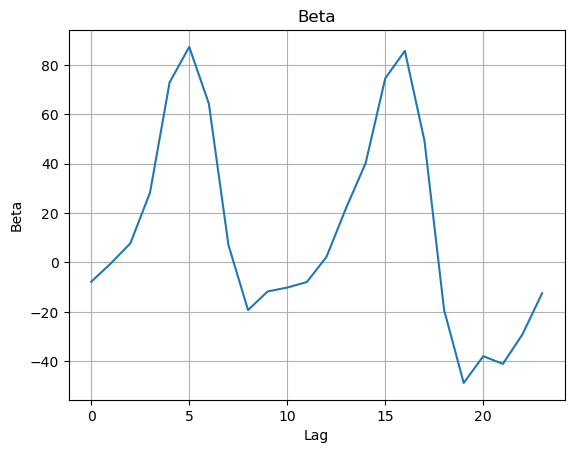

In [34]:
# Plot beta in a line plot
plt.figure()
plt.plot(Beta[-24::], label='Beta')
plt.title('Beta')
plt.xlabel('Lag')
plt.ylabel('Beta')
plt.grid()
plt.show()